In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DIABETES PATIENT RE-ADMISSION PREDICTION

### Introduction
Hospital re-admission can indicate issues in patient care and may reveal areas where medical treatment could be improved. Predicting whether a patient will be readmitted allows healthcare providers to adapt treatments proactively, potentially reducing readmission rates and improving patients' outcome. This project focuses on identifying factors associated with readmissions in diabetic patients and aims to build a model to predict readmission risks.

### Problem Statement
In this dataset, I aim to predict one of three possible patient outcomes:

**1. No Readmission:** The patient was not readmitted after discharge.

**2. Readmission in Less than 30 Days:** Early readmission suggests potential issues with the initial treatment, which could be adjusted to reduce recurrence.

**3. Readmission in More than 30 Days:** While less severe than early readmission, this still suggests potential follow-up care adjustments based on the patient's condition.

The objective of the project is to develop models that predict these readmission categories, enabling more proactive and effective patient care strategies.

## Data Description
The dataset spans 10 years of clinical data (1999-2008) from 130 hospitals and healthcare networks across the United States. It includes over 50 features that represent various aspects of patient health, demographics, and hospital treatment details. The dataset focuses exclusively on inpatient diabetic encounters with the following criteria:

- Hospital admission (inpatient encounter).
- Diagnosis of diabetes during the encounter.
- Length of stay ranging from 1 to 14 days.
- Laboratory tests and medication administration during the encounter.

**Key Attributes in the Dataset**

The data contains a range of attributes, including:
   - Patient Demographics: Patient ID, race, gender, age.
    
   - Admission Details: Admission type, duration of stay, medical specialty of the admitting physician.
    
   - Clinical Tests and Results: Number of lab tests, HbA1c test results, primary and secondary diagnoses.
    
   - Medication Data: Number of medications administered, diabetic medications prescribed.
    
   - Hospital Visit History: Number of outpatient, inpatient, and emergency visits in the year before the current hospitalization.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings

In [3]:
# Load data
df = pd.read_csv('/content/drive/Othercomputers/My Laptop - Personal/Files/Data_Files/Portfolio Projects/Diabetes - Readmission/diabetic_data.csv')
# df = pd.read_csv('diabetic_data.csv')
df.head(3)

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  

[3 rows x 50 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Column description for the data
 https://onlinelibrary.wiley.com/doi/10.1155/2014/781670

| Feature                     | Type     | Description                                                                                                                                                                                                                                                                                                    |
|-----------------------------|----------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Encounter ID**            | Numeric  | Unique identifier of an encounter                                                                                                                                                                                                                                                                              |
| **Patient number**          | Numeric  | Unique identifier of a patient                                                                                                                                                                                                                                                                                 |
| **Race**                    | Nominal  | Values: Caucasian, Asian, African American, Hispanic, and other                                                                                                                                                                                                                                               |
| **Gender**                  | Nominal  | Values: male, female, and unknown/invalid                                                                                                                                                                                                                                                                      |
| **Age**                     | Nominal  | Grouped in 10-year intervals: [0, 10), [10, 20), …, [90, 100)                                                                                                                                                                                                                                                 |
| **Weight**                  | Numeric  | Weight in pounds.                                                                                                                                                                                                                                                                                             |
| **Admission type**          | Nominal  | Integer identifier corresponding to 9 distinct values, e.g., emergency, urgent, elective, newborn, and not available                                                                                                                                                                                          |
| **Discharge disposition**    | Nominal  | Integer identifier corresponding to 29 distinct values, e.g., discharged to home, expired, and not available                                                                                                                                                                                                   |
| **Admission source**         | Nominal  | Integer identifier corresponding to 21 distinct values, e.g., physician referral, emergency room, and transfer from a hospital                                                                                                                                                                                |
| **Time in hospital**        | Numeric  | Integer number of days between admission and discharge                                                                                                                                                                                                                                                        |
| **Payer code**              | Nominal  | Integer identifier corresponding to 23 distinct values, e.g., Blue Cross/Blue Shield, Medicare, and self-pay                                                                                                                                                                                                  |
| **Medical specialty**       | Nominal  | Integer identifier of the admitting physician's specialty, corresponding to 84 distinct values, e.g., cardiology, internal medicine, family/general practice, and surgeon                                                                                                                                       |
| **Number of lab procedures**| Numeric  | Number of lab tests performed during the encounter                                                                                                                                                                                                                                                             |
| **Number of procedures**    | Numeric  | Number of procedures (other than lab tests) performed during the encounter                                                                                                                                                                                                                                     |
| **Number of medications**   | Numeric  | Number of distinct generic names administered during the encounter                                                                                                                                                                                                                                            |
| **Number of outpatient visits** | Numeric  | Number of outpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                              |
| **Number of emergency visits** | Numeric | Number of emergency visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                |
| **Number of inpatient visits**  | Numeric | Number of inpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                |
| **Diagnosis 1**             | Nominal  | The primary diagnosis (coded as the first three digits of ICD9); 848 distinct values                                                                                                                                                                                                                          |
| **Diagnosis 2**             | Nominal  | Secondary diagnosis (coded as the first three digits of ICD9); 923 distinct values                                                                                                                                                                                                                            |
| **Diagnosis 3**             | Nominal  | Additional secondary diagnosis (coded as the first three digits of ICD9); 954 distinct values                                                                                                                                                                                                                 |
| **Number of diagnoses**     | Numeric  | Number of diagnoses entered into the system                                                                                                                                                                                                                                                                    |
| **Glucose serum test result** | Nominal | Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured                                                                                                                                                                                  |
| **A1c test result**         | Nominal  | Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was between 7% and 8%, “normal” if less than 7%, and “none” if not measured.                                                                                                |
| **Change of medications**   | Nominal  | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”                                                                                                                                                                                     |
| **Diabetes medications**    | Nominal  | Indicates if any diabetic medication was prescribed. Values: “yes” and “no”                                                                                                                                                                                                                                  |
| **24 features for medications** | Nominal | For 24 generic names (e.g., metformin, insulin, glyburide-metformin), indicates whether the drug was prescribed or if there was a change in dosage. Values: “up” if dosage increased, “down” if decreased, “steady” if unchanged, and “no” if not prescribed |
| **Readmitted**              | Nominal  | Days to inpatient readmission. Values: “<30” if readmitted within 30 days, “>30” if readmitted after 30 days, and “No” if not readmitted                                                                                                                                |

## Data Understanding

In [5]:
# general statistics for the data
df.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

In [6]:
def data_structure(data):
    """
    Function provides an overview of the dataset by showing:
    - List of column names
    - Shape of the dataframe
    - Unique number of patients
    - Unique races and genders
    - Missing values per column

    Arguments:
    data : pd.DataFrame
        The dataset to analyze.

    Returns:
    None
    """
    # List of column names
    columns = data.columns
    print(f"\nList of columns in dataframe:\n {columns}")

    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}': {unique_values}\n")

    # Shape of data
    print(f"\nShape of the dataframe: {data.shape}")

    # Missing values per column
    missing_values = data.isna().sum()[data.isna().sum() > 0]
    missing_percentage = (missing_values / len(data)) * 100
    print(f"\nColumns with missing values:\n{missing_values}\n Missing values in percentage\n{missing_percentage.round(2)}%)\n")

In [7]:
data_structure(df)


List of columns in dataframe:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Column 'encounter_id': [  2278392    

### Checking missing/ Null values

In [8]:
# Comuns with '?' as a value for missing data
for column in df.columns:
    count = (df[column]== '?').sum()
    if count > 0:
        print(f"'{column}' contains '{count}' occurrences of '?'")

'race' contains '2273' occurrences of '?'
'weight' contains '98569' occurrences of '?'
'payer_code' contains '40256' occurrences of '?'
'medical_specialty' contains '49949' occurrences of '?'
'diag_1' contains '21' occurrences of '?'
'diag_2' contains '358' occurrences of '?'
'diag_3' contains '1423' occurrences of '?'


- Columns with missing null values
     - max_glu_serum  -  96420
     - A1Cresult     -   84748
- Columns with '?' value repressenting missing data
     - race  - 2273
     - weight  - 98569
     - payer_code  - 40256
     - medical_specialty -  49949
     - diag_1  - 21
     - diag_2  - 358
     - diag_3  - 1423

In [9]:
df[df['gender']== 'Unknown/Invalid']

encounter_id  patient_nbr   race           gender      age weight  \
30506      98634858    100695042  Other  Unknown/Invalid  [70-80)      ?   
75551     226864668     60524946      ?  Unknown/Invalid  [60-70)      ?   
82573     257364294     78119847      ?  Unknown/Invalid  [70-80)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
30506                  3                         1                    1   
75551                  1                         1                    7   
82573                  1                        22                    7   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
30506                 1  ...          No      No                   No   
75551                 1  ...          No      No                   No   
82573                 8  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
30506                   No                        No                       No   
75551                   No                        No                       No   
82573                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
30506                      No      Ch         Yes         NO  
75551                      No      No          No         NO  
82573                      No      Ch         Yes         NO  

[3 rows x 50 columns]

- Drop the max_glu_serum, A1Cresult, weight, payer_code and medical_specialty columns since they have large amount of missing values.
- For the rest of the columns, fill the missing values with the average value


## Exploratory Data Analysis
- First drop irrelevant columns then fill the null/missing values with their column means.
- Convert value data types to more relevant ones

In [10]:
# drop columns
columns_to_drop = ['max_glu_serum', 'A1Cresult', 'weight', 'payer_code', 'medical_specialty']
data = df.drop(columns=columns_to_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [11]:
# Convert datatypes
data['encounter_id'] = data['encounter_id'].astype(str)
data['patient_nbr'] = data['patient_nbr'].astype(str)
data['admission_type_id'] = data['admission_type_id'].astype(str)
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype(str)
data['admission_source_id'] = data['admission_source_id'].astype(str)


In [12]:
# Fill missing values
# Define categorical columns with missing values
categorical_columns = ['gender','race', 'diag_1', 'diag_2', 'diag_3']

# Replace '?' with nan
data.replace(['?', 'Unknown/Invalid'], np.nan, inplace=True)

# Fill missing values in each categorical column with the mode
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [13]:
# Columns with '?' as a value for missing data for new dataframe
for filled_column in data.columns:
    count = (data[filled_column] == '?').sum()
    if count > 0:
        print(f"'{filled_column}' contains '{count}' occurrences of '?'")

In [14]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

### Data Visualization for the cleaned data

In [15]:
import plotly.express as px

fig = px.histogram(data, x='gender', color='readmitted', title='Readmission by Gender')
fig.show()

In [16]:
fig = px.histogram(data, x='race', title='Distribution of Patients by Race')
fig.show()

In [17]:
# Age range distribution
fig = px.histogram(data, x='age', title='Distribution of Patients by Age Range')
fig.show()

In [18]:
# Age range vs readmission status
fig = px.histogram(data, x='age', color='readmitted', barmode='group',
                   title='Readmission Status by Age Range')
fig.show()

In [19]:
# Average time in hospital vs age range
avg_time_in_hospital = data.groupby('age')['time_in_hospital'].mean().reset_index()
fig = px.bar(avg_time_in_hospital, x='age', y='time_in_hospital',
             title='Average Time in Hospital by Age Range')
fig.show()

<Axes: xlabel='race'>

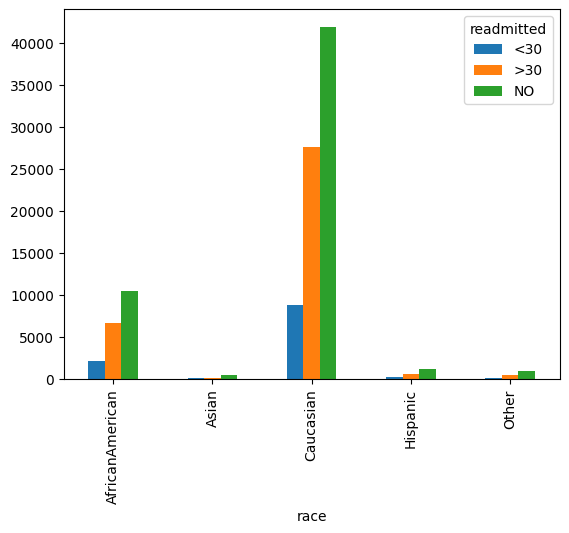

In [20]:
# Readmission by race
pd.crosstab(data['race'], data['readmitted']).plot(kind='bar')

<Axes: xlabel='gender'>

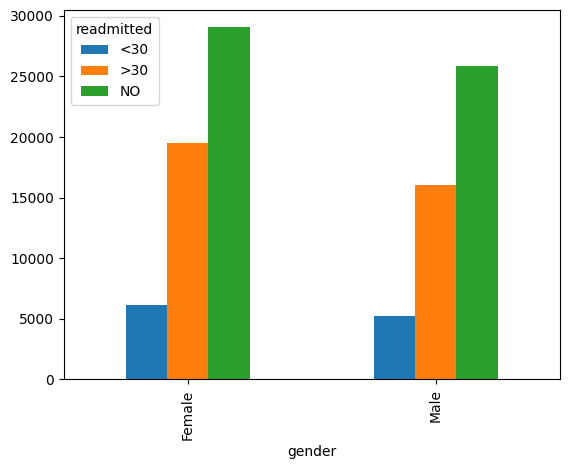

In [21]:
# Readmission by gender
pd.crosstab(data['gender'], data['readmitted']).plot(kind='bar')

In [22]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  object
 1   patient_nbr               101766 non-null  object
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  object
 6   discharge_disposition_id  101766 non-null  object
 7   admission_source_id       101766 non-null  object
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [24]:
# - Drop columns involving id (patient identification)
# Use ordinal encoding for medication
medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

medication_map = {'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
data[medication_cols] = data[medication_cols].replace(medication_map)

# Use ordinal encoding for age ranges (mid-value for the mapping)
age_map = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
            '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
data['age'] = data['age'].replace(age_map)

# Binary encoding for binary features (diabetesMed, change)
diabetesMed_map = {'No': 0, 'Yes': 1}
data['diabetesMed'] = data['diabetesMed'].replace(diabetesMed_map)

change_map = {'No': 0, 'Ch': 1}
data['change'] = data['change'].replace(change_map)

# ordinal encoding for readmitted feature
readmitted_map = {'<30': 0, '>30': 1, 'NO': 2}
data['readmitted'] = data['readmitted'].replace(readmitted_map)

# One-hot encoding for nominal categorical features
nominal_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3']
data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

data_encoded.head().T

<ipython-input-24-9fc7258fb715>:12: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-24-9fc7258fb715>:18: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-24-9fc7258fb715>:22: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-24-9fc7258fb715>:25: FutureWarning:

Downca

0         1         2         3         4
encounter_id              2278392    149190     64410    500364     16680
patient_nbr               8222157  55629189  86047875  82442376  42519267
age                             5        15        25        35        45
admission_type_id               6         1         1         1         1
discharge_disposition_id       25         1         1         1         1
...                           ...       ...       ...       ...       ...
diag_3_V66                  False     False     False     False     False
diag_3_V70                  False     False     False     False     False
diag_3_V72                  False     False     False     False     False
diag_3_V85                  False     False     False     False     False
diag_3_V86                  False     False     False     False     False

[2295 rows x 5 columns]

In [25]:
# Drop the identity columns from the encoded dataFrame
columns_to_drop = ['encounter_id', 'patient_nbr', 'admission_type_id',
                   'discharge_disposition_id', 'admission_source_id']
data_encoded = data_encoded.drop(columns=columns_to_drop)

data_encoded.shape

(101766, 2290)

In [26]:
data_encoded.sample(10)

age  time_in_hospital  num_lab_procedures  num_procedures  \
32983   55                 2                  15               0   
11909   75                 3                  52               0   
78255   65                 4                  49               0   
75084   65                 9                  75               3   
92645   55                 1                  23               0   
46865   55                 4                  44               0   
75599   85                 2                  26               0   
85134   75                 5                  80               0   
773     75                 5                  54               0   
72364   55                 2                  40               6   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
32983                7                  2                 0                 0   
11909               17                  0                 0                 0   
78255               10                  0                 0                 0   
75084               23                  0                 0                 0   
92645                7                  0                 0                 0   
46865               18                  0                 0                 0   
75599                7                  0                 1                 2   
85134               18                  0                 0                 0   
773                 13                  0                 0                 3   
72364               10                  0                 0                 0   

       number_diagnoses  metformin  ...  diag_3_V61  diag_3_V62  diag_3_V63  \
32983                 2          0  ...       False       False       False   
11909                 9          1  ...       False       False       False   
78255                 9          0  ...       False       False       False   
75084                 9          0  ...       False       False       False   
92645                 9          0  ...       False       False       False   
46865                 9          1  ...       False       False       False   
75599                 9          0  ...       False       False       False   
85134                 9          0  ...       False       False       False   
773                   7          0  ...       False       False       False   
72364                 9          0  ...       False       False       False   

       diag_3_V64  diag_3_V65  diag_3_V66  diag_3_V70  diag_3_V72  diag_3_V85  \
32983       False       False       False       False       False       False   
11909       False       False       False       False       False       False   
78255       False       False       False       False       False       False   
75084       False       False       False       False       False       False   
92645       False       False       False       False       False       False   
46865       False       False       False       False       False       False   
75599       False       False       False       False       False       False   
85134       False       False       False       False       False       False   
773         False       False       False       False       False       False   
72364       False       False       False       False       False       False   

       diag_3_V86  
32983       False  
11909       False  
78255       False  
75084       False  
92645       False  
46865       False  
75599       False  
85134       False  
773         False  
72364       False  

[10 rows x 2290 columns]

- The encoded data has over 2000 features which is alot to compute for a simple correlation matrix.

## Feature Analysis Importance

- Use a Random Forest model to show most important features

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Features
X = data_encoded.drop('readmitted', axis=1)
# Target
y = data_encoded['readmitted']

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

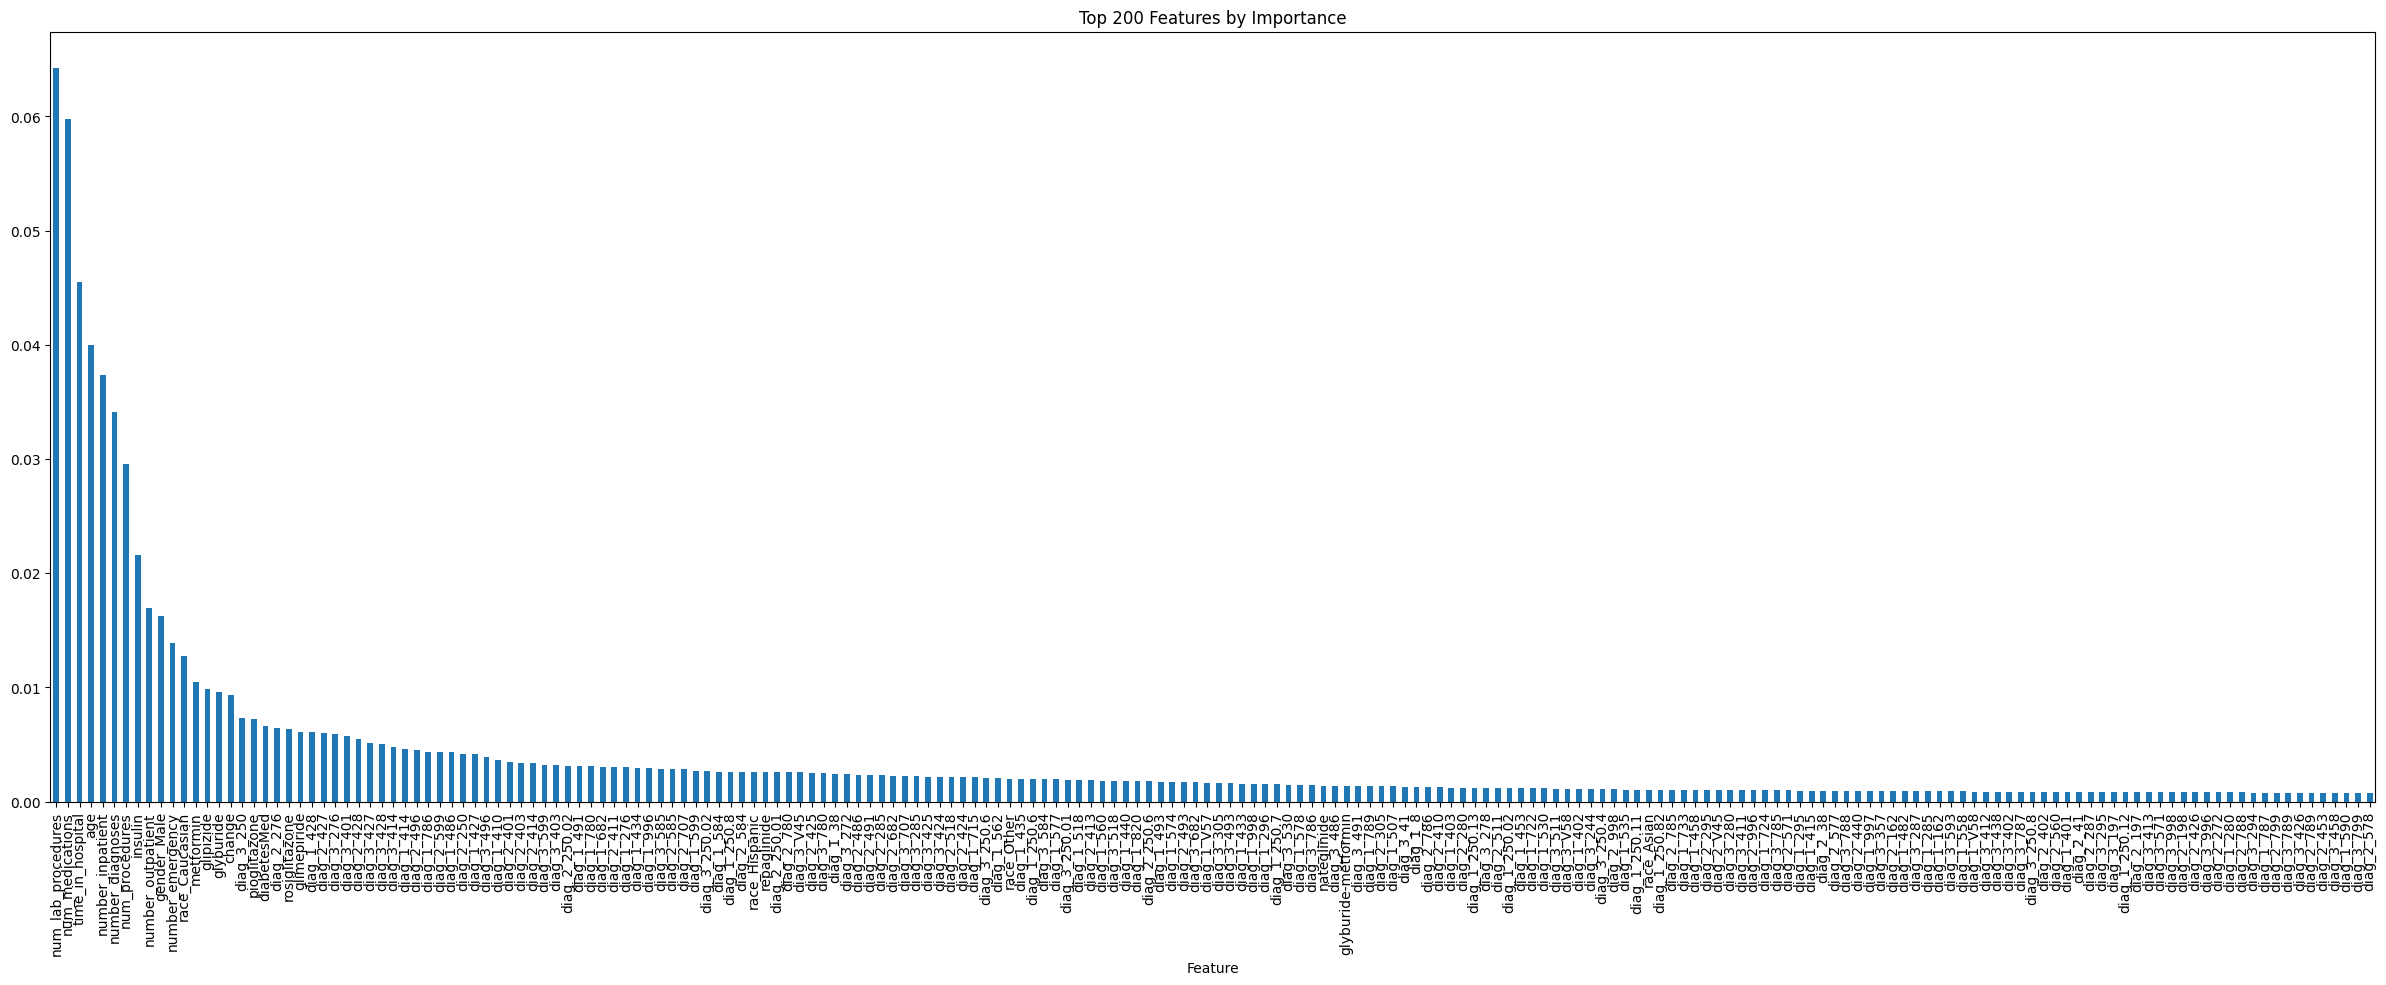

In [28]:
# get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 100 features
feature_importances.head(200).plot.bar(x='Feature', y='Importance', figsize=(30, 10), legend=False)
plt.title('Top 200 Features by Importance')
plt.show()

- From the chart, from about 0.01, the feature importance tends to slowly get steady, therefore features below 0.01 importance can be discarded.

In [29]:
# Filter features above 0.01 importance
top_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
X_top = X[top_features]
X_top.columns

Index(['num_lab_procedures', 'num_medications', 'time_in_hospital', 'age',
       'number_inpatient', 'number_diagnoses', 'num_procedures', 'insulin',
       'number_outpatient', 'gender_Male', 'number_emergency',
       'race_Caucasian', 'metformin'],
      dtype='object')

In [30]:
# subset the data with top features
X_top = data_encoded[top_features]

## Modelling

- Logistic Regression for a base line model
- Random Forest for a more balance between performance and interpretability - Features will have to be reduced
- Gradient Boosted Trees (XGBoost)

### 1. Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features
X = X = X_top
# Target from encoded data
y = data_encoded['readmitted']

# Train the model
# Initialize the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

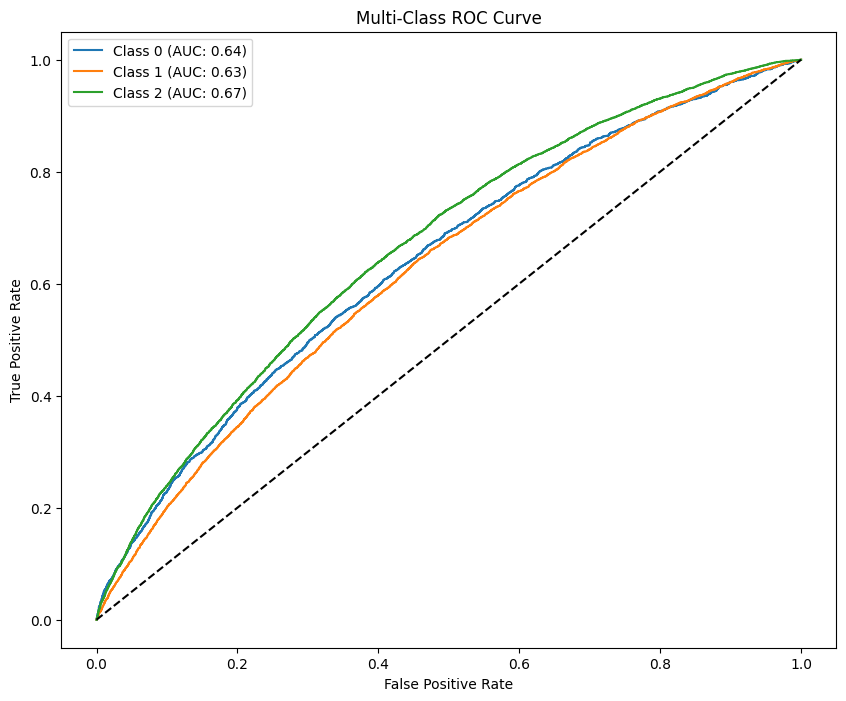

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target
y_test_binarized = label_binarize(y_test, classes=log_reg.classes_)

# Compute probabilities
y_prob = log_reg.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(log_reg.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC: {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

- The model's AUC for each class is indicated in the legend:

     * Class 0: AUC of 0.64
     * Class 1: AUC of 0.63
     * Class 2: AUC of 0.67
- The highest AUC here is 0.67 for Class 2, meaning the model performs best in distinguishing Class 2 from the others.

- Diagonal Line (Dotted): The dotted line represents a random classifier, where the true positive rate equals the false positive rate (i.e., AUC = 0.5). Curves above this line indicate better-than-random performance.
- Overall, the ROC curves show the model's moderate ability to classify instances in each class.

### 2. Random Forest

In [33]:
# Features - using the subset
X = X_top
# Target from encoded data
y = data_encoded['readmitted']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestClassifier with specified parameters
rf = RandomForestClassifier(
    n_estimators=100,          # Number of trees in the forest
    max_depth=20,              # Maximum depth of the trees
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.01      0.02      2285
           1       0.47      0.34      0.39      7117
           2       0.60      0.84      0.70     10952

    accuracy                           0.57     20354
   macro avg       0.48      0.39      0.37     20354
weighted avg       0.53      0.57      0.52     20354



- To know the most optimal ways to tune the parameters, use RandomizedSearchCV. It samples a subset of combinations which is faster

In [37]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Randomized search
# random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
#                                    param_distributions=param_grid, n_iter=50, cv=5,
#                                    random_state=42, n_jobs=-1, verbose=2)
# random_search.fit(X_train, y_train)
# print("Best Parameters:", random_search.best_params_)

- Best parameters

    'n_estimators': 100

    'min_samples_split': 2

    'min_samples_leaf': 4

    'max_features': 'sqrt'

    'max_depth': 10}

In [41]:
# Initialize RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=15,
    random_state=42
)

# Train the model
rf_best.fit(X_train, y_train)

# Predict on test data
y_pred = rf_best.predict(X_test)
y_prob = rf_best.predict_proba(X_test)[:, 1]

# Evaluate the model with classification report and ROC curve
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.01      0.02      2285
           1       0.49      0.32      0.39      7117
           2       0.60      0.85      0.70     10952

    accuracy                           0.57     20354
   macro avg       0.52      0.39      0.37     20354
weighted avg       0.55      0.57      0.52     20354



### 3. Gradient Boosted Trees (XGBoost)

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier with some parameters
xgb_model = XGBClassifier(
    n_estimators=100,           # Number of boosting rounds
    max_depth=6,                # Maximum depth of a tree
    learning_rate=0.1,          # Step size shrinkage
    subsample=0.8,              # Fraction of samples for each tree
    colsample_bytree=0.8,       # Fraction of features for each tree
    random_state=42,
    eval_metric='logloss'       # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.02      0.03      2285
           1       0.49      0.32      0.39      7117
           2       0.60      0.86      0.71     10952

    accuracy                           0.58     20354
   macro avg       0.52      0.40      0.38     20354
weighted avg       0.55      0.58      0.52     20354



In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,           # Number of parameter settings sampled
    scoring='roc_auc',   # Metric to optimize for
    cv=3,                # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1            # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best AUC-ROC Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:54:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best AUC-ROC Score: nan


In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier with some parameters
xgb_model = XGBClassifier(
    n_estimators=300,           # Number of boosting rounds
    max_depth=3,                # Maximum depth of a tree
    learning_rate=0.01,          # Step size shrinkage
    subsample=1.0,              # Fraction of samples for each tree
    colsample_bytree=0.8,       # Fraction of features for each tree
    random_state=42,
    eval_metric='logloss'       # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.01      0.02      2285
           1       0.49      0.27      0.35      7117
           2       0.59      0.88      0.71     10952

    accuracy                           0.57     20354
   macro avg       0.50      0.39      0.36     20354
weighted avg       0.54      0.57      0.51     20354

